<a href="https://colab.research.google.com/github/Mateo289/Teoria_senales/blob/main/19_Nov_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instala el paquete mne si es necesario
!pip install mne

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
<ipython-input-50-9176612ab77d>:37: RuntimeWarning: Not adaptively combining the spectral estimators due to a low number of tapers (2 < 3).
  psd_multitaper, f_multitaper = psd_array_multitaper(x_con_ruido, sfreq=fs, fmin=2, fmax=fs/2, adaptive=True, normalization='full', bandwidth=2.5, verbose=0)


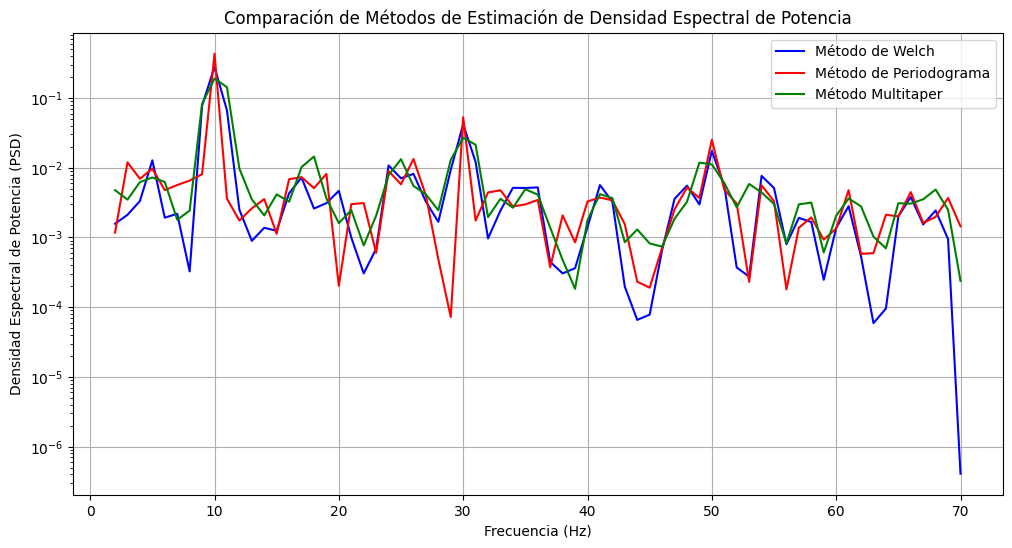

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, periodogram, spectrogram
from mne.time_frequency import psd_array_multitaper  # Paquete multitaper


# Parámetros de la señal
fs = 140  # Frecuencia de muestreo (Hz)
t = np.arange(0, 1, 1/fs)  # Vector de tiempo de 1 segundo

# Frecuencia de la señal (en radianes)
w0 = 2 * np.pi * 10  # Frecuencia de 10 Hz

# Definición de la señal original según la ecuación proporcionada
x_original = np.cos(w0 * t) - (1/3) * np.sin(3*w0 * t) + (1/5) * np.cos(5*w0 * t)

# Añadiendo ruido gaussiano blanco a la señal
ruido = np.random.normal(0, 0.5, t.shape)  # Ruido con desviación estándar de 0.5
x_con_ruido = x_original + ruido

# Método de Welch para estimación de densidad espectral de potencia
f_welch, psd_welch = welch(x_con_ruido, fs, nperseg=256)

# Filtrar las frecuencias para que comiencen desde 2 Hz
mask_welch = f_welch >= 2
f_welch = f_welch[mask_welch]
psd_welch = psd_welch[mask_welch]

# Método de Periodograma para estimación de densidad espectral de potencia
f_periodogram, psd_periodogram = periodogram(x_con_ruido, fs, scaling='density')

# Filtrar las frecuencias para que comiencen desde 2 Hz
mask_periodogram = f_periodogram >= 2
f_periodogram = f_periodogram[mask_periodogram]
psd_periodogram = psd_periodogram[mask_periodogram]

# Método Multitaper para estimación de densidad espectral de potencia
psd_multitaper, f_multitaper = psd_array_multitaper(x_con_ruido, sfreq=fs, fmin=2, fmax=fs/2, adaptive=True, normalization='full', bandwidth=2.5, verbose=0)

# Gráfica de superposición de los tres métodos
plt.figure(figsize=(12, 6))
plt.semilogy(f_welch, psd_welch, label="Método de Welch", color="blue")
plt.semilogy(f_periodogram, psd_periodogram, label="Método de Periodograma", color="red")
plt.semilogy(f_multitaper, psd_multitaper, label="Método Multitaper", color="green")  # Agrega la gráfica del método Multitaper
plt.title("Comparación de Métodos de Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (PSD)")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:462: UserWarning: Input data is complex, switching to return_onesided=False
  freqs, Pxx = csd(x, x, fs=fs, window=window, nperseg=nperseg,


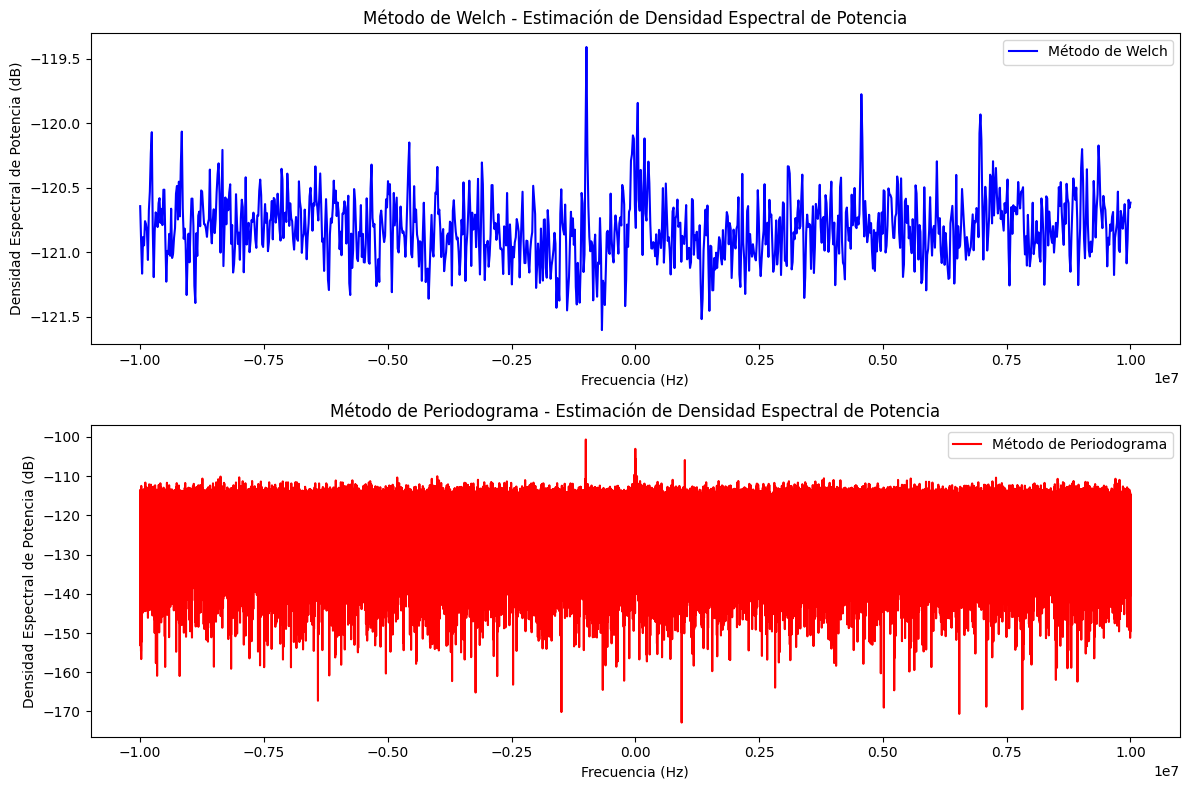

In [ ]:
# Cargar el archivo de muestras
sample = np.load("/content/Viernes_5G(center freq_ 161000000.0, sample rate_ 20000000.0, vga gain_ 0, lna gain_ 0,num samples_ 200000(1).npy).npy")

# Parámetros de la señal
fs = 20000000  # Frecuencia de muestreo (Hz)
nperseg = 1024  # Tamaño de segmento

# Método de Welch para estimación de densidad espectral de potencia
f_welch, psd_welch = welch(sample, fs, nperseg=nperseg)

# Ajustar PSD con fftshift y centrar el eje de frecuencias para Welch
frequencies_welch = np.linspace(-fs / 2, fs / 2, len(f_welch))  # Eje de frecuencias centrado
psd_welch_shifted = np.fft.fftshift(psd_welch)  # PSD centrada en f = 0

# Calcular la media del PSD y establecer el pico en f = 0 igual a la media (Welch)
mean_psd_welch = np.mean(psd_welch_shifted)
psd_welch_shifted[len(psd_welch_shifted) // 2] = mean_psd_welch  # Ajuste al índice central

# Método de Periodograma para estimación de densidad espectral de potencia
f_periodogram, psd_periodogram = periodogram(sample, fs)

# Ajustar PSD con fftshift y centrar el eje de frecuencias para Periodograma
frequencies_periodogram = np.linspace(-fs / 2, fs / 2, len(f_periodogram))  # Eje de frecuencias centrado
psd_periodogram_shifted = np.fft.fftshift(psd_periodogram)  # PSD centrada en f = 0

# Calcular la media del PSD y establecer el pico en f = 0 igual a la media (Periodograma)
mean_psd_periodogram = np.mean(psd_periodogram_shifted)
psd_periodogram_shifted[len(psd_periodogram_shifted) // 2] = mean_psd_periodogram  # Ajuste al índice central

# Convertir PSD a escala de decibeles
psd_welch_db = 10 * np.log10(psd_welch_shifted)
psd_periodogram_db = 10 * np.log10(psd_periodogram_shifted)

# Gráfica del método de Welch
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(frequencies_welch, psd_welch_db, label="Método de Welch", color="blue")
plt.title("Método de Welch - Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (dB)")
plt.legend()

# Gráfica del método de Periodograma
plt.subplot(2, 1, 2)
plt.plot(frequencies_periodogram, psd_periodogram_db, label="Método de Periodograma", color="red")
plt.title("Método de Periodograma - Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (dB)")
plt.legend()

# Ajustar el layout para que no se solapen las gráficas
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:462: UserWarning: Input data is complex, switching to return_onesided=False
  freqs, Pxx = csd(x, x, fs=fs, window=window, nperseg=nperseg,


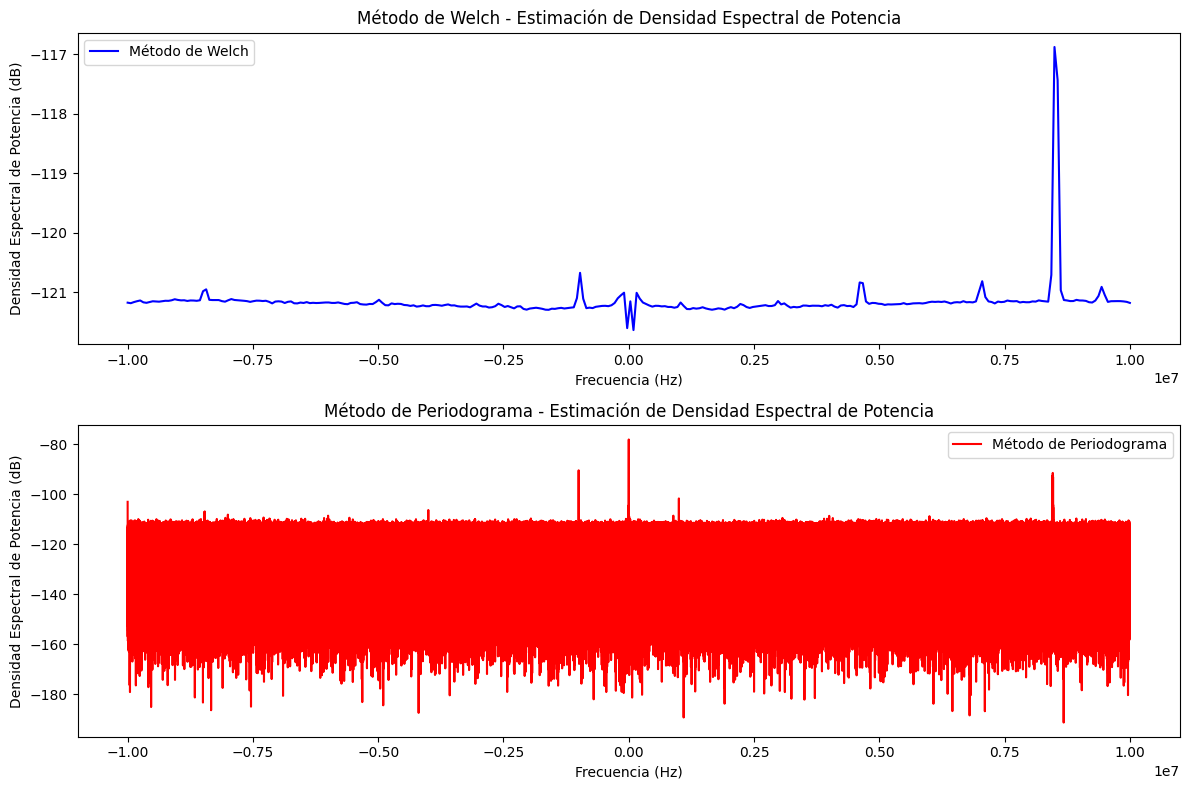

In [ ]:
# Cargar el archivo de muestras
sample = np.load("/content/5G(center freq_ 161000000.0, sample rate_ 20000000.0, vga gain_ 0, lna gain_ 0,num samples_ 20000000(1).npy).npy")

# Parámetros de la señal
fs = 20000000  # Frecuencia de muestreo (Hz)
nperseg = 3200  # Tamaño de segmento

# Método de Welch para estimación de densidad espectral de potencia
f_welch, psd_welch = welch(sample, fs, nperseg=nperseg)

# Ajustar PSD con fftshift y centrar el eje de frecuencias para Welch
frequencies_welch = np.linspace(-fs / 2, fs / 2, len(f_welch))  # Eje de frecuencias centrado
psd_welch_shifted = np.fft.fftshift(psd_welch)  # PSD centrada en f = 0

# Calcular la media del PSD y establecer el pico en f = 0 igual a la media (Welch)
mean_psd_welch = np.mean(psd_welch_shifted)
psd_welch_shifted[len(psd_welch_shifted) // 2] = mean_psd_welch  # Ajuste al índice central

# Método de Periodograma para estimación de densidad espectral de potencia
f_periodogram, psd_periodogram = periodogram(sample, fs)

# Ajustar PSD con fftshift y centrar el eje de frecuencias para Periodograma
frequencies_periodogram = np.linspace(-fs / 2, fs / 2, len(f_periodogram))  # Eje de frecuencias centrado
psd_periodogram_shifted = np.fft.fftshift(psd_periodogram)  # PSD centrada en f = 0

# Calcular la media del PSD y establecer el pico en f = 0 igual a la media (Periodograma)
mean_psd_periodogram = np.mean(psd_periodogram_shifted)
psd_periodogram_shifted[len(psd_periodogram_shifted) // 2] = mean_psd_periodogram  # Ajuste al índice central

# Convertir PSD a escala de decibeles
psd_welch_db = 10 * np.log10(psd_welch_shifted)
psd_periodogram_db = 10 * np.log10(psd_periodogram_shifted)

# Gráfica del método de Welch
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(frequencies_welch, psd_welch_db, label="Método de Welch", color="blue")
plt.title("Método de Welch - Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (dB)")
plt.legend()

# Gráfica del método de Periodograma
plt.subplot(2, 1, 2)
plt.plot(frequencies_periodogram, psd_periodogram_db, label="Método de Periodograma", color="red")
plt.title("Método de Periodograma - Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (dB)")
plt.legend()

# Ajustar el layout para que no se solapen las gráficas
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Leer el archivo CSV
file_path = '/content/148-174-Frequency-Bandwidht.xlsx - Sheet1.csv'
data = pd.read_csv(file_path)

# Extraer los valores de frequency y bandwidth como arreglos
frequencies = data['frequency'].to_numpy()
bandwidths = data['bandwidth'].to_numpy()

# Mostrar los arreglos
print("Frequencies:", frequencies)
print("Bandwidths:", bandwidths)

Frequencies: ['148,0125' '148,025' '148,0375' ... '173,8875' '173,9375' '173,9875']
Bandwidths: ['12,5' '12,5' '12,5' ... '12,5' '12,5' '12,5']
